In [0]:
# 古いコードを実行するためのおまじない
%tensorflow_version 1.x

In [0]:
# 演習用データ ex2data1.txt をアップロードするためのコード
from google.colab import files
uploaded = files.upload() 

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

from keras.models import Sequential
from keras.layers.core import Dense, Activation

In [0]:
# データファイルの読み込み
data = np.genfromtxt('ex2data1.txt', delimiter=',')

In [0]:
X = data[:, (0, 1)]
t = data[:, 2]

# データの各次元が平均0、分散1になるように正規化
X = preprocessing.scale(X)

# ロジスティック回帰モデルを構築
model = Sequential()
model.add(Dense(1, input_shape=(2, )))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 訓練
model.fit(X, t, nb_epoch=1000, batch_size=5)

In [0]:
# 学習した重みを取得
weights = model.layers[0].get_weights()
w1 = weights[0][0, 0]
w2 = weights[0][1, 0]
b = weights[1][0]

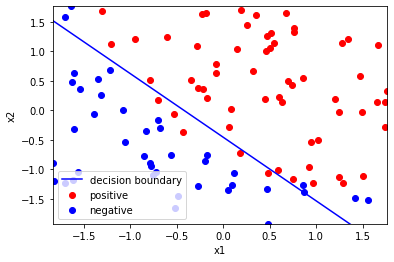

In [14]:
import matplotlib.pyplot as plt

def plot_data(X, t):
    positive = [i for i in range(len(t)) if t[i] == 1]
    negative = [i for i in range(len(t)) if t[i] == 0]

    plt.scatter(X[positive, 0], X[positive, 1], c='red', marker='o', label='positive')
    plt.scatter(X[negative, 0], X[negative, 1], c='blue', marker='o', label='negative')

# plot training data
plt.figure(1)
plot_data(X, t)
# draw decision boundary
plt.figure(1)
xmin, xmax = min(X[:, 0]), max(X[:, 0])
ymin, ymax = min(X[:, 1]), max(X[:, 1])
xs = np.linspace(xmin, xmax, 100)
ys = [- (w1 / w2) * x - (b / w2) for x in xs]
plt.plot(xs, ys, 'b-', label='decision boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.legend()
plt.show()